# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm

from sklearn.cluster import AgglomerativeClustering 
from matplotlib.colors import ListedColormap
from sklearn import mixture

Load feature names.

In [2]:
feature_names = []
with open('Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print 'Loaded feature names:', len(feature_names)

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [3]:
X, Y = [], []

with open('Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print train_data.shape, test_data.shape

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

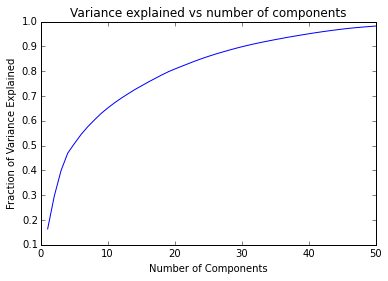

In [115]:
def P1():

### STUDENT START ###

### Let's define an array from 1 to 50 to use as an index for components
    k_values = np.arange(1,51)
### Define two list that we can later plot to see realationship between variance explained and components used
    k_plot, sum_var_plot = [], []
### Let's start a loop that examines PCA for the range of components described above
    for k in range(len(k_values)):
        pca = PCA(n_components=k_values[k])
        pca.fit(train_data)
### Calculate the explained variance for each number of component
        sum_var = sum((pca.explained_variance_ratio_))
### Append values        
        k_plot.append(k_values[k])
        sum_var_plot.append(sum_var)
    
### Plot
    plt.plot(k_plot, sum_var_plot)
    plt.title('Variance explained vs number of components')
    plt.ylabel('Fraction of Variance Explained') 
    plt.xlabel('Number of Components') 
    plt.show()



### STUDENT END ###

P1()

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

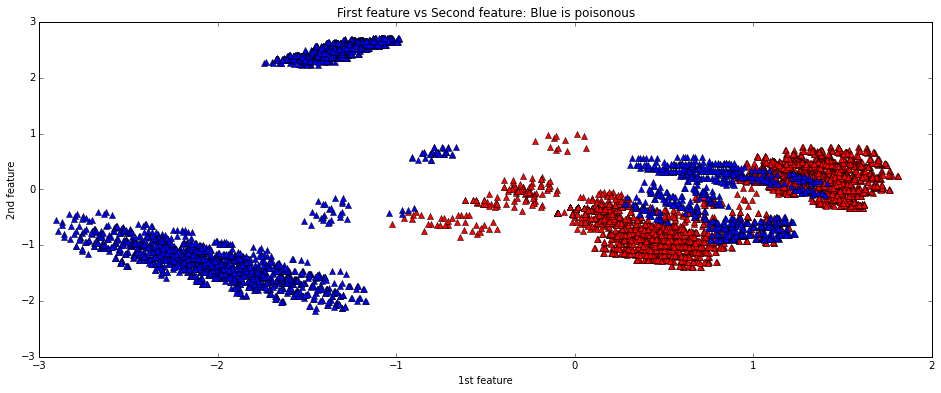

In [118]:


def P2():
### STUDENT START ###

### Define a PCA adjusted data
    pca = PCA(n_components=2)
    train_data_pca = pca.fit_transform(train_data)

### Define x and y coordinates of two cases: poisonous and nonpoisonous
    x_poison = []
    y_poison = []
    x_non_poison = []
    y_non_poison = []
    for i in range(train_data_pca.shape[0]):
        if train_labels[i]== 0:
            x_non_poison.append(train_data_pca[i,0])
            y_non_poison.append(train_data_pca[i,1])
        else:
            x_poison.append(train_data_pca[i,0])
            y_poison.append(train_data_pca[i,1])
        

### Plot coordinates: Blue is posionous and red is not
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 1, 1)
    plt.plot(x_non_poison, y_non_poison, 'r^', x_poison, y_poison, 'b^')
    plt.title('First feature vs Second feature: Blue is poisonous')
    plt.ylabel('2nd feature') 
    plt.xlabel('1st feature') 
    mng = plt.get_current_fig_manager()
    mng.full_screen_toggle()
    plt.show()

### STUDENT END ###

P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

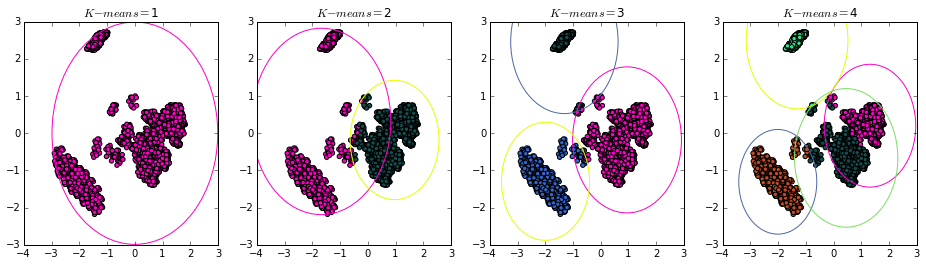

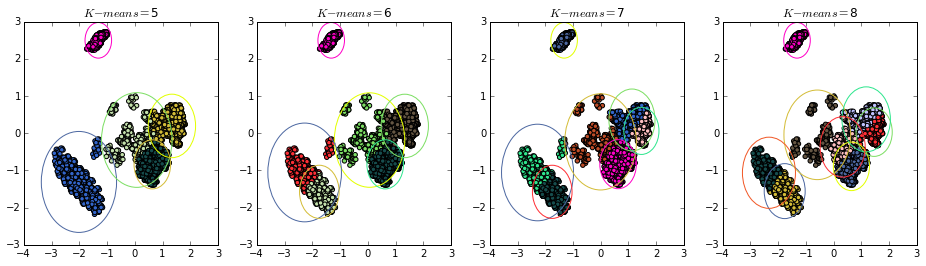

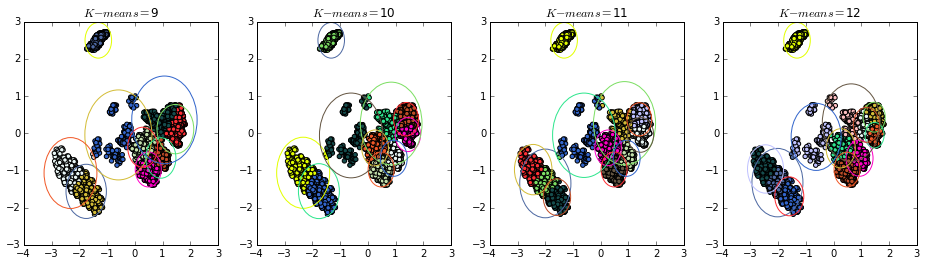

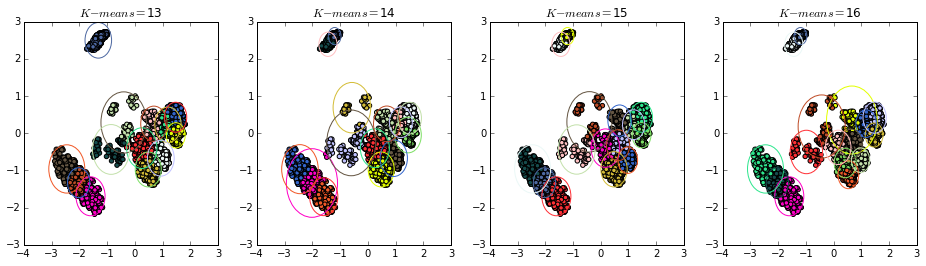

In [121]:

def P3():
### STUDENT START ###

### Define a PCA adjusted data
    pca = PCA(n_components=2)
    train_data_pca = pca.fit_transform(train_data)

### Define number of clusters to evaluate
    clusters= np.arange(1,17,1)
    colors = ['#ff00c7', '#e3ff00', '#4e69a2', '#7ddf64', '#d4bd38', '#2fe68e','#ff3036', '#f15928', '#3366cc','#655643','#bf4d28', '#c0c2ff', '#c4e1ac', '#ffc0c2','#ebf8f7', '#164d4d']  

    

    
### For each cluster find out its centroid and figure out the radius so you can plot a circle that includes all data points from the cluster        
    for clust in clusters:

        km = KMeans(n_clusters=clust)
        km.fit(train_data_pca)

        centroids = km.cluster_centers_ ### Calculate centroids
        labels = km.labels_ 
        radiuses = np.zeros(clust) 
        cm_bright = ListedColormap(colors) ### Color schema
        for i in range (train_data_pca.shape[0]):
            label = labels[i]
            coord_x, coord_y = train_data_pca[i,0], train_data_pca[i,1]
            centroid_x, centroid_y = centroids[label][0], centroids[label][1]
            local_max_rad = ((coord_x - centroid_x)**2+(coord_y - centroid_y)**2)**(0.5)
            ### Find maximum radius on each cluster
            if local_max_rad > radiuses[label]: radiuses[label] = local_max_rad
    
### Define each row of plots
        if clust == 1:
            subplot_index = 1
            fig = plt.figure(figsize=(16, 4))      
        elif clust ==5:
            subplot_index = 1
            fig = plt.figure(figsize=(16, 4))  
        elif clust ==9:
            subplot_index = 1
            fig = plt.figure(figsize=(16, 4)) 
        elif clust ==13:
            subplot_index = 1
            fig = plt.figure(figsize=(16, 4))            
### Plot        
        p = plt.subplot(1, 4, subplot_index)
        ax = fig.add_subplot(1, 4, subplot_index)
        p.scatter(train_data_pca[:, 0], train_data_pca[:, 1], c=km.predict(train_data_pca), cmap=cm_bright)
        for c in range(clust):
            circ = plt.Circle(centroids[c], radius=radiuses[c], color=colors[c], fill=False)
            ax.add_patch(circ)
            plt.title(r'$K-means=$%s'%clust )
        
        subplot_index += 1


### STUDENT END ###

P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

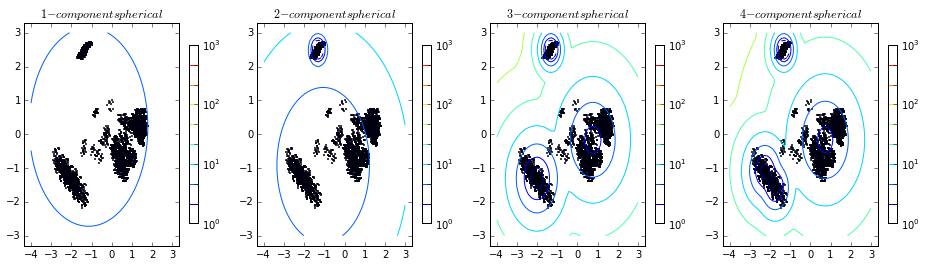

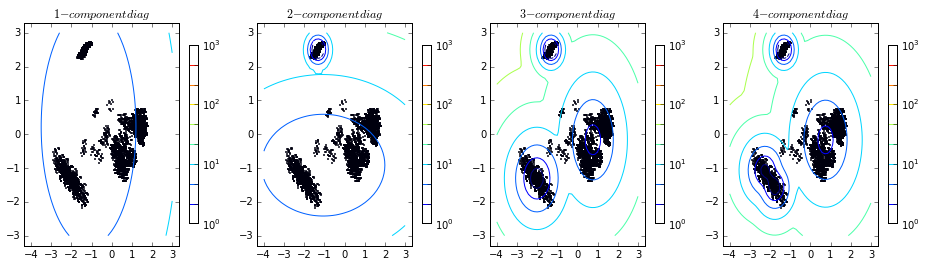

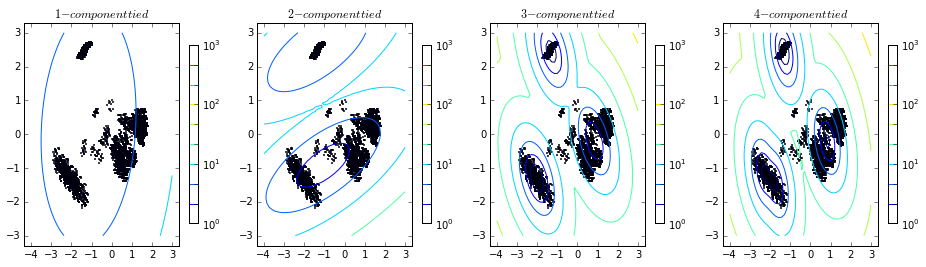

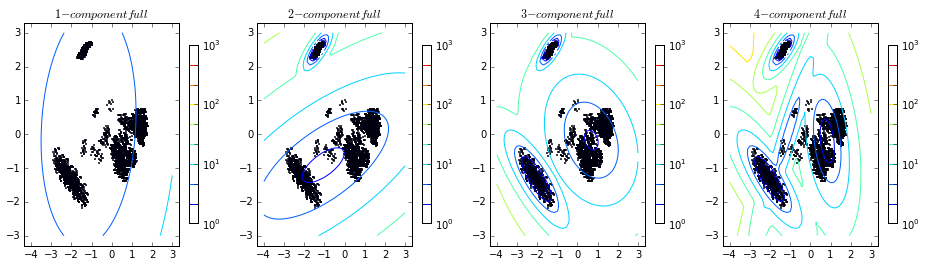

In [136]:
### STUDENT START ###

def gmm_plot(train_data, comp, covar):

# fit a Gaussian Mixture Model with comp components
    gmm = mixture.GMM(n_components=comp, covariance_type=covar)
    gmm.fit(train_data)

# display predicted scores by the model as a contour plot
    x = np.linspace(-4.0, 3.0)
    y = np.linspace(-3.0, 3.0)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = -gmm.score_samples(XX)[0]
    Z = Z.reshape(X.shape)

    p = plt.subplot(1, 4, comp)
    CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),levels=np.logspace(0, 3, 10))
    CB = plt.colorbar(CS, shrink=0.8, extend='both')
    p.scatter(X_r[:, 0], X_r[:, 1], .8)
    plt.title(r'$%s-component %s %s $'%(comp,' ', covar))
    plt.axis('tight')

def example_selector(train_data, train_labels, typeofexamples):
    if typeofexamples == 'positive': target_label =1
    else: target_label = 0
        
#### Separate data into positive and negative examples using the index of the original data
    target_index = []
    for i in range(len(train_labels)):
        if train_labels[i] == target_label: target_index.append(i)
    
### Break orignal train data into two matrix: one for positive and another one for negative    
    target_train_data = np.zeros((len(target_index), train_data.shape[1]))
    for i in range (len(target_index)):
        target_train_data[i] = train_data[target_index[i]]

    return target_train_data
    

def P4():
### Define a PCA adjusted data
    pca = PCA(n_components=2)
    train_data_pca = pca.fit_transform(train_data)
### Select only positive examples
    train_data_positive = example_selector(train_data_pca,train_labels,'positive')

    covariance_types= ['spherical', 'diag', 'tied', 'full']
    for covar in covariance_types:
        fig = plt.figure(figsize=(16, 4))
        for comp in range(1,5):
            gmm_plot(train_data_positive,comp, covar)


### STUDENT END ###

P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [137]:


    
### STUDENT START ###

### Fit a Gaussian Mixture Model with 4 components and full covariance for each case
def gmm_alternating(train_data_positive, train_data_negative, test_data, test_labels,comp, covar):
    gmm_pos = mixture.GMM(n_components=comp, covariance_type=covar) ### positive
    gmm_neg = mixture.GMM(n_components=comp, covariance_type=covar) ### negative
    gmm_pos.fit(train_data_positive) ### positive
    gmm_neg.fit(train_data_negative) ### negative
    ypred_positive = gmm_pos.predict(test_data) ### positive
    ypred_negative = gmm_neg.predict(test_data) ### negative
    positive_score = gmm_pos.score(test_data) ### positive
    negative_score = gmm_neg.score(test_data) ### negative

### Use model with highest probability score to make predictions and check accuracy
    ypred = []
    correct = 0
    for i in range(test_data.shape[0]):
        if positive_score[i]>negative_score[i]: 
            ypred.append(1)
            if test_labels[i]==1:correct+=1        
        else: 
            ypred.append(0)
            if test_labels[i]==0:correct+=1
    accuracy = float(correct)/float(len(test_labels))
    return accuracy

def P5():   
### Define a PCA adjusted data
    pca = PCA(n_components=2)
    train_data_pca = pca.fit_transform(train_data)
    test_data_pca = pca.transform(test_data)

### Select data according to its labels
    train_data_positive = example_selector(train_data_pca,train_labels,'positive')
    train_data_negative = example_selector(train_data_pca,train_labels,'negative')

#### Run function that alternates GMM model according to the higher probability    
    accuracy = gmm_alternating(train_data_positive, train_data_negative, test_data_pca, test_labels, 4, 'full')*100
    print 'Alternating the best predictor model results on an accuracy of:%4.2f%%'%(accuracy)





### STUDENT END ###
P5()


Alternating the best predictor model results on an accuracy of:95.11%


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [148]:
def P6():
### STUDENT START ###

    def covar_count(covar_type, pca_vec, gmm_comp, classes):
        if covar_type == 'spherical': covar_count = 1*gmm_comp*classes
        elif covar_type == 'diag': covar_count = pca_vec*gmm_comp*classes
        elif covar_type == 'tied': covar_count = (pca_vec+pca_vec*(pca_vec-1)/2)*1*classes
        elif covar_type == 'full': covar_count = (pca_vec+pca_vec*(pca_vec-1)/2)*gmm_comp*classes
        return covar_count

    def pca_count(pca_vec, gmm_comp, classes):
        pca_count = pca_vec*gmm_comp*classes
        return pca_count

    def parameter_count(covar_type, pca_vec, gmm_comp, classes):
        p = pca_count(pca_vec,gmm_comp,classes) + covar_count(covar_type, pca_vec, gmm_comp, classes)
        return p


### First step. Calculate number of parameters to be used:
    index = 0
    classes = 2
    covariance_types= ['spherical', 'diag', 'tied', 'full']
    pca_vectors, covariance_list, gmm_components, parameters, accuracies = [], [], [], [], [] 
    for i in range(2,25):    
        for covar in covariance_types: 
            for comp in range(1,8):
                pca_vec = i
                pca_vectors.append(pca_vec)
            
                covar_type = covar
                covariance_list.append(covar_type)          
            
                gmm_comp = comp
                gmm_components.append(gmm_comp)

                p = parameter_count(covar_type, pca_vec, gmm_comp, classes)
                parameters.append(p)
                index += 1

            
### Second step. Transform data into PCA vectors
                if p < 51:
                    pca = PCA(n_components=pca_vec)
                    train_data_pca = pca.fit_transform(train_data)
                    test_data_pca = pca.transform(test_data)

### Third step. Select data according to its labels
                    train_data_positive = example_selector(train_data_pca,train_labels,'positive')
                    train_data_negative = example_selector(train_data_pca,train_labels,'negative')            


### Fourth step. Fit a GMM model using gmm_alternating function
                    a = gmm_alternating(train_data_positive, train_data_negative, test_data_pca, test_labels,comp, covar)*100
                    accuracies.append(a)
                else:
                    accuracies.append('N/A')

### List results in order
    table = zip(pca_vectors, covariance_list, gmm_components, parameters, accuracies)
    table = sorted(table,key=lambda item: item[3], reverse=False)
    
    print '%20s' %'PCA Components', '%20s' %'Covariance type', '%20s' %'GMM Components', '%20s' %'# of parameters', '%20s' %'% Accuracy'
    for i in range (index):
        if table[i][3] < 51:
            print '%20d' %table[i][0], '%20s' %table[i][1], '%20d' %table[i][2], '%20d' %table[i][3], '%20.2f'%table[i][4]

### STUDENT END ###

P6()

       PCA Components      Covariance type       GMM Components      # of parameters           % Accuracy
                   2            spherical                    1                    6                86.03
                   2                 diag                    1                    8                86.21
                   3            spherical                    1                    8                87.19
                   2                 tied                    1                   10                86.21
                   2                 full                    1                   10                86.21
                   4            spherical                    1                   10                86.30
                   2            spherical                    2                   12                87.37
                   3                 diag                    1                   12                86.92
                   5            spherical             